# DL4CV Lecture Demo

In [33]:
import torch
import torchvision
import torchvision.transforms as T
from torchvision.models import (
    resnet18, resnet34, resnet50, resnet101, resnet152,
    ResNet18_Weights, ResNet34_Weights,
    ResNet50_Weights, ResNet101_Weights,
    ResNet152_Weights
)
from torchvision.io import read_image
import pandas as pd

### Initialization of the ResNet networks
Let's see how well different ResNet networks with varying depth handle
image classification tasks 

In [37]:
models_list = ['ResNet18', 'ResNet34', 
               'ResNet50', 'ResNet101', 
               'ResNet152']

model = dict.fromkeys(models_list)
weights = dict.fromkeys(models_list)
pre_proc = dict.fromkeys(models_list)
DS_ver = 'IMAGENET1K_V1'
# DS_ver = 'DEFAULT'
for net_model in models_list:
    weights[net_model] = eval('{}_Weights.{}'.format(net_model, DS_ver))
    ctor = net_model.lower()
    model[net_model] = eval(f'{ctor}(weights={weights[net_model]})')
    model[net_model].eval();
    pre_proc[net_model] = weights[net_model].transforms(antialias=True)

In [51]:
# Store the results in a data-frame
predict_df = pd.DataFrame(columns=['Model', 'Top-Class', 'Top-k', 'img'])

<h3>Basic image classification</h3>
Arbitrary image, 
<font color='red', style='background :yellow; font-weight: bold'>not</font> 
from the
<font style='font-style: italic'>training</font>
<font color='red', style='background :yellow; font-weight: bold'>nor</font> 
from the
<font style='font-style: italic'>test</font>
datasets <br>
A defined class of ImageNet

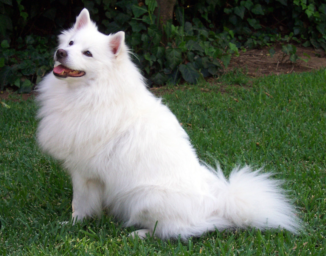

In [35]:
img_path = 'imgs/dog.jpg'
img = read_image(img_path)
img_resized = T.functional.resize(img, pre_proc['ResNet101'].resize_size,
                interpolation=pre_proc['ResNet101'].interpolation, 
                antialias=pre_proc['ResNet101'].antialias)
T.ToPILImage()(img_resized).show()
# T.ToPILImage()(img).show()

In [47]:
# Predict function imported from Mxl_demo
def predict(nnet, pre_proc_img, topk=3):
    pred = nnet(pre_proc_img.unsqueeze(0)).squeeze(0).softmax(0)
    # class_id = pred.argmax().item()
    # cat_list = [ weights.meta["categories"][idx] for idx in topk_idx ]
    [topk_scores, topk_idx] = pred.topk(topk)
    topk_str_arr = []
    for k, obj_idx in enumerate(topk_idx):
        topk_str_arr.append('{} ({:.2f}%)'.format(
            weights[mdl].meta["categories"][obj_idx], 
            100 * topk_scores[k])
        )
    top_class = topk_str_arr.pop(0)
    topk_str = ', '.join(topk_str_arr)

    pred_list = [
        top_class,
        topk_str
        # f"{weights['ResNet50'].meta["categories"][class_id]}: {100 * pred[class_id].item():.2f}%"
    ]
    return pred_list
    # predict_df.loc[len(predict_df)] = pred_list
    # return predict_df

In [42]:
for mdl_idx, net_arch in enumerate(models_list):
    p_df = predict(model[net_arch], pre_proc[net_arch](img))
    predict_df.loc[len(predict_df)] = [net_arch, p_df[0], p_df[1], img_path]

predict_df

Model               img                               Top-Class  \
0   ResNet18  Samoyed (88.30%)  white wolf (4.67%), Arctic fox (4.48%)   
1   ResNet34  Samoyed (88.41%)  Pomeranian (3.97%), Arctic fox (2.50%)   
2   ResNet50  Samoyed (87.07%)  Pomeranian (3.15%), white wolf (2.02%)   
3  ResNet101  Samoyed (95.20%)  Pomeranian (1.87%), white wolf (0.75%)   
4  ResNet152  Samoyed (79.00%)  Pomeranian (8.95%), white wolf (3.68%)   

          Top-k  
0  imgs/dog.jpg  
1  imgs/dog.jpg  
2  imgs/dog.jpg  
3  imgs/dog.jpg  
4  imgs/dog.jpg

Very high accuracy, and confidence rates<br>
Let's see how well the model classifies an image <font color='red'>**from**</font> the training set

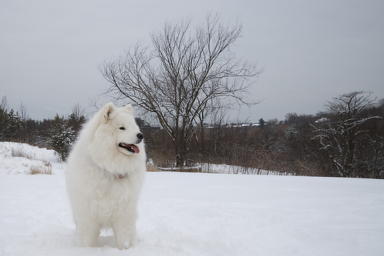

In [43]:
img_path = 'imgs/ILSVRC2012_val_00035585.JPEG'
img = read_image(img_path)
img_resized = T.functional.resize(img, pre_proc['ResNet101'].resize_size,
                interpolation=pre_proc['ResNet101'].interpolation, 
                antialias=pre_proc['ResNet101'].antialias)
T.ToPILImage()(img_resized).show()

In [44]:
for mdl_idx, net_arch in enumerate(models_list):
    p_df = predict(model[net_arch], pre_proc[net_arch](img))
    predict_df.loc[len(predict_df)] = [net_arch, p_df[0], p_df[1], img_path]

predict_df

Model               img                                   Top-Class  \
0   ResNet18  Samoyed (88.30%)      white wolf (4.67%), Arctic fox (4.48%)   
1   ResNet34  Samoyed (88.41%)      Pomeranian (3.97%), Arctic fox (2.50%)   
2   ResNet50  Samoyed (87.07%)      Pomeranian (3.15%), white wolf (2.02%)   
3  ResNet101  Samoyed (95.20%)      Pomeranian (1.87%), white wolf (0.75%)   
4  ResNet152  Samoyed (79.00%)      Pomeranian (8.95%), white wolf (3.68%)   
5   ResNet18  Samoyed (85.00%)   Great Pyrenees (12.74%), malamute (0.88%)   
6   ResNet34  Samoyed (98.97%)  Great Pyrenees (0.38%), white wolf (0.24%)   
7   ResNet50  Samoyed (90.35%)     Great Pyrenees (6.36%), dogsled (0.49%)   
8  ResNet101  Samoyed (99.18%)  Great Pyrenees (0.19%), Eskimo dog (0.12%)   
9  ResNet152  Samoyed (99.48%)     Great Pyrenees (0.23%), dogsled (0.06%)   

                               Top-k  
0                       imgs/dog.jpg  
1                       imgs/dog.jpg  
2                       imgs/dog.jpg  
3                       imgs/dog.jpg  
4                       imgs/dog.jpg  
5  imgs/ILSVRC2012_val_00035585.JPEG  
6  imgs/ILSVRC2012_val_00035585.JPEG  
7  imgs/ILSVRC2012_val_00035585.JPEG  
8  imgs/ILSVRC2012_val_00035585.JPEG  
9  imgs/ILSVRC2012_val_00035585.JPEG

Even higher confidence rates<br>
What about a more challenging image <font color='red'>**from**</font> the test set?

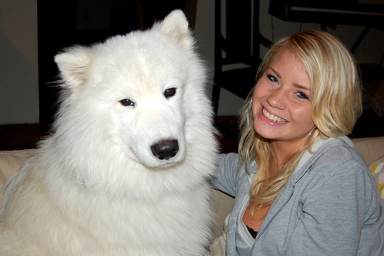

In [45]:
img_path = 'imgs/n02111889_7198.JPEG'
img = read_image(img_path)
img_resized = T.functional.resize(img, pre_proc['ResNet101'].resize_size,
                interpolation=pre_proc['ResNet101'].interpolation, 
                antialias=pre_proc['ResNet101'].antialias)
T.ToPILImage()(img_resized).show()

In [46]:
for mdl_idx, net_arch in enumerate(models_list):
    p_df = predict(model[net_arch], pre_proc[net_arch](img))
    predict_df.loc[len(predict_df)] = [net_arch, p_df[0], p_df[1], img_path]

predict_df

Model               img                                   Top-Class  \
0    ResNet18  Samoyed (88.30%)      white wolf (4.67%), Arctic fox (4.48%)   
1    ResNet34  Samoyed (88.41%)      Pomeranian (3.97%), Arctic fox (2.50%)   
2    ResNet50  Samoyed (87.07%)      Pomeranian (3.15%), white wolf (2.02%)   
3   ResNet101  Samoyed (95.20%)      Pomeranian (1.87%), white wolf (0.75%)   
4   ResNet152  Samoyed (79.00%)      Pomeranian (8.95%), white wolf (3.68%)   
5    ResNet18  Samoyed (85.00%)   Great Pyrenees (12.74%), malamute (0.88%)   
6    ResNet34  Samoyed (98.97%)  Great Pyrenees (0.38%), white wolf (0.24%)   
7    ResNet50  Samoyed (90.35%)     Great Pyrenees (6.36%), dogsled (0.49%)   
8   ResNet101  Samoyed (99.18%)  Great Pyrenees (0.19%), Eskimo dog (0.12%)   
9   ResNet152  Samoyed (99.48%)     Great Pyrenees (0.23%), dogsled (0.06%)   
10   ResNet18  Samoyed (87.94%)  white wolf (9.47%), Great Pyrenees (1.64%)   
11   ResNet34  Samoyed (99.25%)      white wolf (0.53%), Eskimo dog (0.10%)   
12   ResNet50  Samoyed (91.95%)      white wolf (6.61%), Eskimo dog (0.72%)   
13  ResNet101  Samoyed (98.25%)      white wolf (1.42%), Eskimo dog (0.16%)   
14  ResNet152  Samoyed (98.98%)  white wolf (0.93%), Great Pyrenees (0.04%)   

                                Top-k  
0                        imgs/dog.jpg  
1                        imgs/dog.jpg  
2                        imgs/dog.jpg  
3                        imgs/dog.jpg  
4                        imgs/dog.jpg  
5   imgs/ILSVRC2012_val_00035585.JPEG  
6   imgs/ILSVRC2012_val_00035585.JPEG  
7   imgs/ILSVRC2012_val_00035585.JPEG  
8   imgs/ILSVRC2012_val_00035585.JPEG  
9   imgs/ILSVRC2012_val_00035585.JPEG  
10           imgs/n02111889_7198.JPEG  
11           imgs/n02111889_7198.JPEG  
12           imgs/n02111889_7198.JPEG  
13           imgs/n02111889_7198.JPEG  
14           imgs/n02111889_7198.JPEG

<h4>Image orientation demo</h4>
Now that we are confident enough that our models perform well...<br>
We can drop the shallow models and focus on <font color='red'>ResNet</font><font color='red', style='font-weight: bold'>152</font> only for our demo.<br>
Let's pick an image of an undefined obj class


In [58]:
# New Clean DF
predict_df = pd.DataFrame(columns=['Model', 'Top-Class', 'Top-k', 'description'])
net_arch = 'ResNet152'

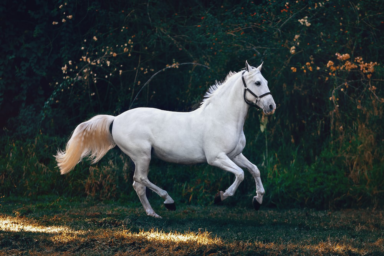

Model        Top-Class                            Top-k  \
0  ResNet152  sorrel (68.88%)  Saluki (10.12%), muzzle (6.13%)   

             description  
0  Arbitrary horse image

In [59]:
img_path = 'imgs/white_horse.jpg'
img = read_image(img_path)
img_resized = T.functional.resize(img, pre_proc['ResNet101'].resize_size,
                interpolation=pre_proc['ResNet101'].interpolation, 
                antialias=pre_proc['ResNet101'].antialias)
T.ToPILImage()(img_resized).show()


p_df = predict(model[net_arch], pre_proc[net_arch](img))
predict_df.loc[len(predict_df)] = [net_arch, p_df[0], p_df[1], 'Arbitrary horse image']

predict_df

The model picked a reddish horse and two breeds of dogs!<br>
Yet, it is a horse...<br>
What will happen if we flip the image? - will it change anything?

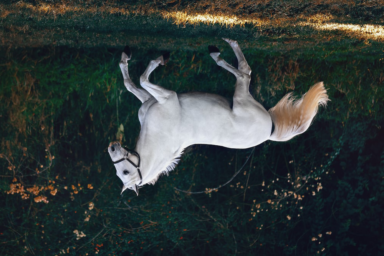

Model        Top-Class                                Top-k  \
0  ResNet152  sorrel (68.88%)      Saluki (10.12%), muzzle (6.13%)   
1  ResNet152  Saluki (90.78%)  whippet (5.22%), hammerhead (0.63%)   

             description  
0  Arbitrary horse image  
1      Rotated horse img

In [60]:
img_rotated = T.functional.rotate(img, 180)
img_resized = T.functional.resize(img_rotated, pre_proc['ResNet101'].resize_size,
                interpolation=pre_proc['ResNet101'].interpolation, 
                antialias=pre_proc['ResNet101'].antialias)
T.ToPILImage()(img_resized).show()


p_df = predict(model[net_arch], pre_proc[net_arch](img_rotated))
predict_df.loc[len(predict_df)] = [net_arch, p_df[0], p_df[1], 'Rotated horse img']

predict_df

<h2>Interesting!!!</h2>
The horse prediction vanished, and now we have 3 dog breeds.

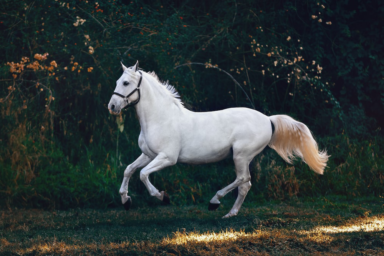

Model        Top-Class                                Top-k  \
0  ResNet152  sorrel (68.88%)      Saluki (10.12%), muzzle (6.13%)   
1  ResNet152  Saluki (90.78%)  whippet (5.22%), hammerhead (0.63%)   
2  ResNet152  Saluki (41.58%)     sorrel (24.64%), muzzle (18.54%)   

             description  
0  Arbitrary horse image  
1      Rotated horse img  
2   Horizontally flipped

In [61]:
# Hflip
img_hflipped = T.functional.hflip(img)
img_resized = T.functional.resize(img_hflipped, pre_proc['ResNet101'].resize_size,
                interpolation=pre_proc['ResNet101'].interpolation, 
                antialias=pre_proc['ResNet101'].antialias)
T.ToPILImage()(img_resized).show()


p_df = predict(model[net_arch], pre_proc[net_arch](img_hflipped))
predict_df.loc[len(predict_df)] = [net_arch, p_df[0], p_df[1], 'Horizontally flipped']

predict_df

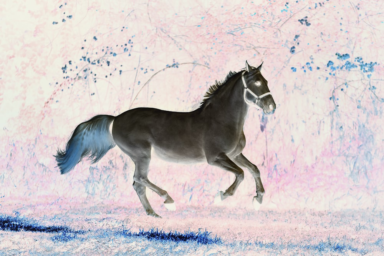

Model        Top-Class                                Top-k  \
0  ResNet152  sorrel (68.88%)      Saluki (10.12%), muzzle (6.13%)   
1  ResNet152  Saluki (90.78%)  whippet (5.22%), hammerhead (0.63%)   
2  ResNet152  Saluki (41.58%)     sorrel (24.64%), muzzle (18.54%)   
3  ResNet152  Saluki (21.07%)      sorrel (12.12%), muzzle (7.67%)   

             description  
0  Arbitrary horse image  
1      Rotated horse img  
2   Horizontally flipped  
3   Inverted horse image

In [62]:
# Inverted
img_inv = T.functional.invert(img)
img_resized = T.functional.resize(img_inv, pre_proc['ResNet101'].resize_size,
                interpolation=pre_proc['ResNet101'].interpolation, 
                antialias=pre_proc['ResNet101'].antialias)
T.ToPILImage()(img_resized).show()


p_df = predict(model[net_arch], pre_proc[net_arch](img_inv))
predict_df.loc[len(predict_df)] = [net_arch, p_df[0], p_df[1], 'Inverted horse image']

predict_df

In [30]:
topk = 3
for mdl_idx,mdl in enumerate(models_list):
    # batch[mdl] = 
    pred = model[mdl](pre_proc[mdl](img).unsqueeze(0)).squeeze(0).softmax(0)
    class_id = pred.argmax().item()

    [topk_scores, topk_idx] = pred.topk(topk)
    # cat_list = [ weights.meta["categories"][idx] for idx in topk_idx ]
    topk_str_arr = []
    for k, obj_idx in enumerate(topk_idx):
        topk_str_arr.append('{} ({:.2f}%)'.format(
            weights[mdl].meta["categories"][obj_idx], 
            100 * topk_scores[k])
        )
    top_class = topk_str_arr.pop(0)
    topk_str = ', '.join(topk_str_arr)

    pred_list = [
        mdl, 
        img_path,
        top_class,
        topk_str
        # f"{weights['ResNet50'].meta["categories"][class_id]}: {100 * pred[class_id].item():.2f}%"
    ]
    predict_df.loc[len(predict_df)] = pred_list
predict_df

Model           img         Top-Class  \
0   ResNet18  imgs/dog.jpg   Samoyed: 88.30%   
1   ResNet34  imgs/dog.jpg   Samoyed: 88.41%   
2   ResNet50  imgs/dog.jpg   Samoyed: 87.07%   
3  ResNet101  imgs/dog.jpg   Samoyed: 95.20%   
4  ResNet152  imgs/dog.jpg   Samoyed: 79.00%   
5   ResNet18  imgs/dog.jpg  Samoyed (88.30%)   
6   ResNet34  imgs/dog.jpg  Samoyed (88.41%)   
7   ResNet50  imgs/dog.jpg  Samoyed (87.07%)   
8  ResNet101  imgs/dog.jpg  Samoyed (95.20%)   
9  ResNet152  imgs/dog.jpg  Samoyed (79.00%)   

                                               Top-k  
0  Samoyed (0.8830230832099915), white wolf (0.04...  
1  Samoyed (0.8840731978416443), Pomeranian (0.03...  
2  Samoyed (0.8707463145256042), Pomeranian (0.03...  
3  Samoyed (0.9519538879394531), Pomeranian (0.01...  
4  Samoyed (0.7899655699729919), Pomeranian (0.08...  
5             white wolf (4.67%), Arctic fox (4.48%)  
6             Pomeranian (3.97%), Arctic fox (2.50%)  
7             Pomeranian (3.15%), white wolf (2.02%)  
8             Pomeranian (1.87%), white wolf (0.75%)  
9             Pomeranian (8.95%), white wolf (3.68%)

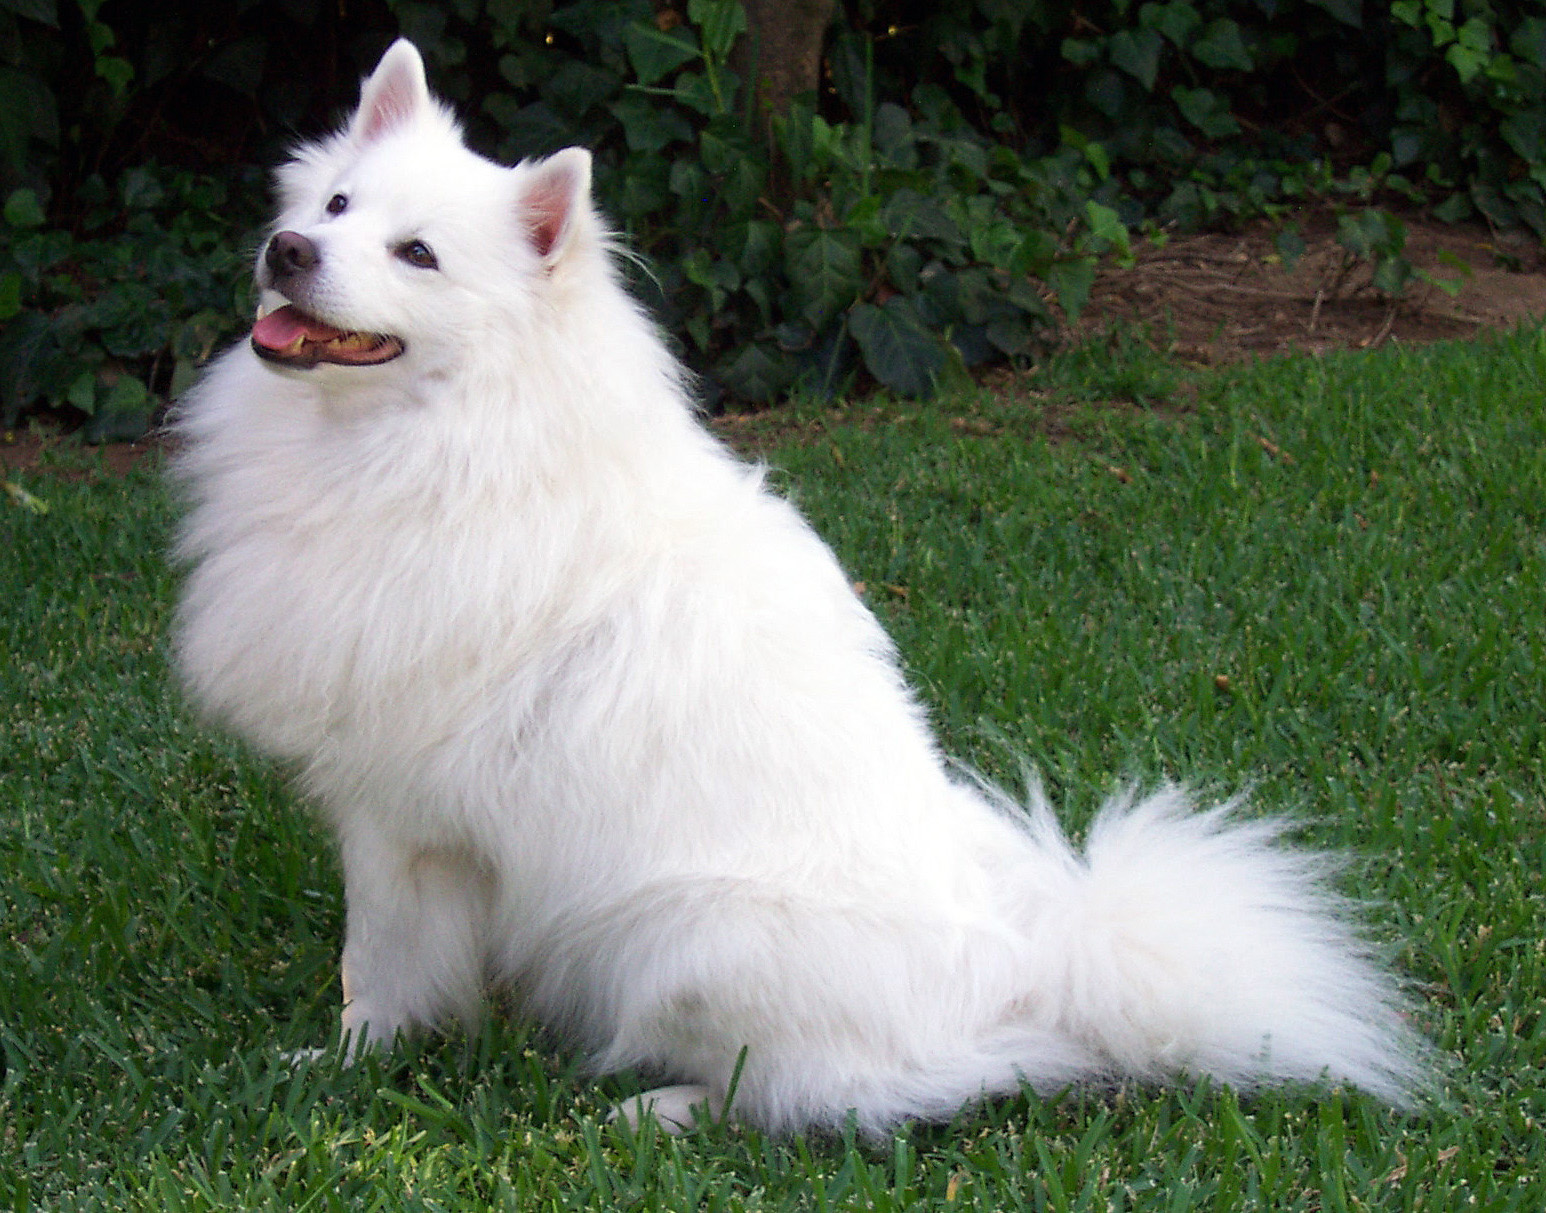

/home/aviadb/miniconda3/envs/sb/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Samoyed: 87.9%


torch.return_types.topk(
values=tensor([0.8786, 0.0239, 0.0161], grad_fn=<TopkBackward0>),
indices=tensor([258, 259, 104]))

In [3]:
# img = read_image("test/assets/encode_jpeg/grace_hopper_517x606.jpg")
img = read_image("imgs/dog.jpg")
img_pil = T.ToPILImage()(img).show()

# img_pil.show()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

prediction
class_id 
prediction.argmax().item()
prediction[class_id]
weights.meta
torch.topk(prediction, 3)

In [6]:
# Initialize the Weight Transforms
weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()

# Apply it to the input image
img_transformed = preprocess(img)

img_transformed

tensor([[[-2.0494, -2.0152, -1.9980,  ..., -1.8268, -1.7412, -1.7583],
         [-2.0494, -2.0323, -1.8610,  ..., -1.9980, -2.0323, -1.8439],
         [-2.0837, -2.0323, -1.9295,  ..., -2.0323, -1.9980, -1.9980],
         ...,
         [-0.4739, -0.8678, -0.6452,  ..., -0.7137, -1.1760, -0.6109],
         [-1.2445, -0.6623, -1.2959,  ..., -1.0390, -1.3302, -1.1075],
         [-0.5424, -1.3130, -0.5596,  ..., -0.8335, -0.9877, -1.2788]],

        [[-2.0007, -2.0357, -1.9832,  ..., -1.5630, -1.5105, -1.5455],
         [-1.9832, -1.9832, -1.9482,  ..., -1.9657, -1.9657, -1.7731],
         [-2.0007, -1.9657, -1.9132,  ..., -2.0007, -1.9657, -1.9307],
         ...,
         [ 0.2927, -0.2675, -0.1275,  ..., -0.0049, -0.4251,  0.2227],
         [-0.5301,  0.4153, -0.7577,  ..., -0.5826, -0.8803, -0.2675],
         [-0.1099, -0.5651,  0.1877,  ..., -0.2150, -0.3375, -0.5126]],

        [[-1.7173, -1.8044, -1.7696,  ..., -1.3861, -1.3164, -1.3339],
         [-1.7696, -1.7347, -1.6999,  ..., -1

## Demo of rotation and Hflip + Vflip

# 2nd